# Notebook to analyse the obtained results

In [10]:
import pandas as pd

data = pd.read_csv('parallel_shortest_path/data/results1.csv')

In [16]:
data

,Algorithm,Parallel,Delta,Graph Size,Density,Threads,Time
0,DeltaStepping,0,1,200,0.1,1,87.679
1,DeltaStepping,0,2,200,0.1,1,83.674
2,DeltaStepping,0,3,200,0.1,1,83.232
3,DeltaStepping,0,4,200,0.1,1,82.354
4,DeltaStepping,0,5,200,0.1,1,78.878
...,...,...,...,...,...,...,...
4015,CustomParallelDeltaStepping,1,4,1000,0.2,25,25408.300
4016,CustomParallelDeltaStepping,1,5,1000,0.2,25,27169.900
4017,CustomParallelDeltaStepping,1,6,1000,0.2,25,31712.900
4018,CustomParallelDeltaStepping,1,7,1000,0.2,25,33982.200


In [20]:
data[" Parallel"]

0       0
1       0
2       0
3       0
4       0
       ..
4015    1
4016    1
4017    1
4018    1
4019    1
Name:  Parallel, Length: 4020, dtype: int64

In [23]:
import matplotlib.pyplot as plt

# filter parallel algos only
data_parallel = data[data[' Parallel']==1]

In [24]:
data_parallel

,Algorithm,Parallel,Delta,Graph Size,Density,Threads,Time
9,CustomParallelDeltaStepping,1,1,200,0.1,2,67.130
10,CustomParallelDeltaStepping,1,2,200,0.1,2,59.049
11,CustomParallelDeltaStepping,1,3,200,0.1,2,57.884
12,CustomParallelDeltaStepping,1,4,200,0.1,2,56.345
13,CustomParallelDeltaStepping,1,5,200,0.1,2,56.837
...,...,...,...,...,...,...,...
4015,CustomParallelDeltaStepping,1,4,1000,0.2,25,25408.300
4016,CustomParallelDeltaStepping,1,5,1000,0.2,25,27169.900
4017,CustomParallelDeltaStepping,1,6,1000,0.2,25,31712.900
4018,CustomParallelDeltaStepping,1,7,1000,0.2,25,33982.200


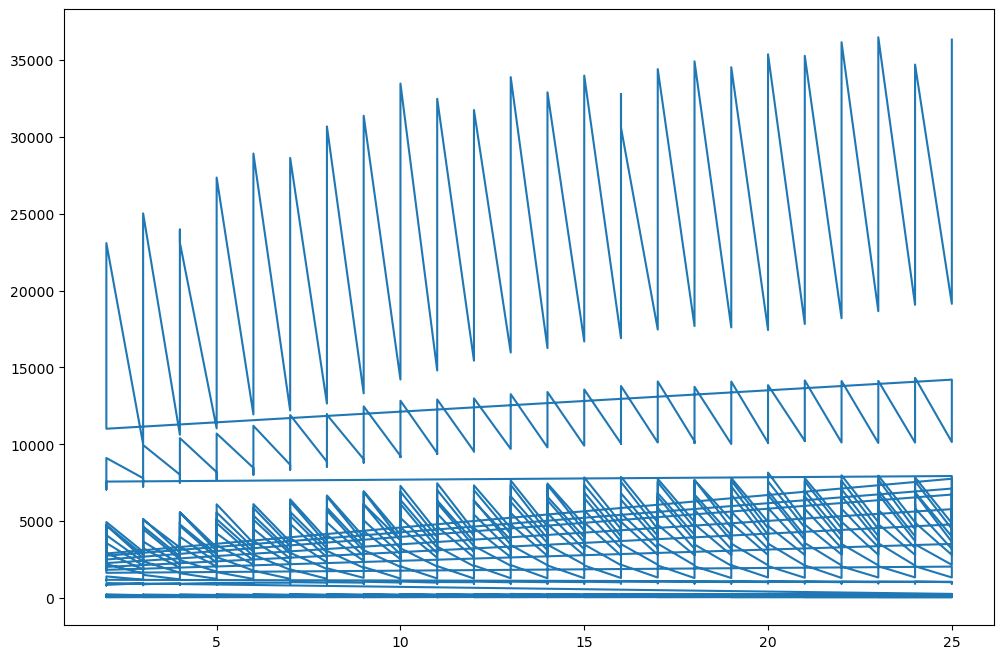

In [30]:
import numpy as np

plt.figure(figsize=(12, 8))
plt.plot(np.array(data_parallel[' Threads'],dtype=int), np.array(data_parallel[' Time'],dtype=float));

In [94]:
from mpl_toolkits.mplot3d import Axes3D

# Create a function that filters all algorithm on graphs of given size 
def plot_graph_size(data, graph_size, graph_density):
    # check tht graph_size and graph_density are in the data
    assert graph_size in data[' Graph Size'].unique(), f"Graph size {graph_size} not in data"
    assert graph_density in data[' Density'].unique(), f"Graph density {graph_density} not in data"

    data_filtered = data[data[' Graph Size']==graph_size]
    data_filtered = data_filtered[data_filtered[' Density']==graph_density]

    # 3d plot with " Delta" and " Threads" as x and y, and " Time" as z
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=10, azim=30)  # change these values as needed

    ax.plot_trisurf(data_filtered[' Delta'], data_filtered[' Threads'], data_filtered[' Time'], alpha=0.7)
    idx = data_filtered["Algorithm"]=='DijkstraSequential'
    t = float(data_filtered[idx][" Time"])
    plt.plot(list(range(1,9)), np.ones(8), t * np.ones(8), marker='o', linestyle='-', color='b')

    plt.xticks(np.array(data_filtered[' Delta'],dtype=int))
    ax.set_xlabel('Delta')
    plt.yticks(np.array(data_filtered[' Threads'],dtype=int))
    ax.set_ylabel('Threads')
    ax.set_zlabel('Time')
    plt.legend()
    plt.show

    # plt.figure(figsize=(12, 8))
    # plt.plot(np.array(data_parallel[' Threads'],dtype=int), np.array(data_parallel[' Time'],dtype=float), label=f'(size,density)={(graph_size,graph_density)}')
    # plt.xlabel('Threads')
    # plt.ylabel('Time')
    # plt.legend()


/tmp/ipykernel_3707312/2628036538.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  t = float(data_filtered[idx][" Time"])
No handles with labels found to put in legend.


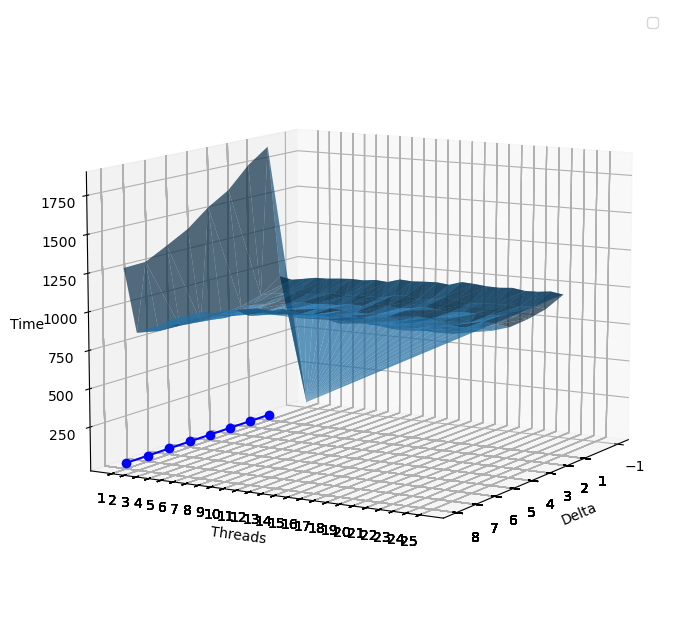

In [95]:
plot_graph_size(data, 500, 0.1)